In [2]:
##Import Libraries


#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

import tensorflow as tf #collection of machine learning algorithms
print("tensorflow version: {}". format(tf.__version__))

import keras  #collection of machine learning algorithms
print("keras version: {}". format(keras.__version__))



#misc libraries
import random
import time


#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)



# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["dir", "input",],shell=True).decode("utf8"))

# Any results you write to the current directory are saved as output.

Python version: 3.7.7 (default, May  6 2020, 11:45:54) [MSC v.1916 64 bit (AMD64)]
pandas version: 1.0.5
matplotlib version: 3.2.2
NumPy version: 1.18.1
SciPy version: 1.4.1
IPython version: 7.14.0
scikit-learn version: 0.23.1
tensorflow version: 2.2.0


Using TensorFlow backend.


keras version: 2.4.2
-------------------------
 Volume in drive C has no label.
 Volume Serial Number is 9E12-1BF2

 Directory of C:\Users\Odin\PycharmProjects\Machine-Learning-HWs\HW03\input

06/14/2020  12:22 PM    <DIR>          .
06/14/2020  12:22 PM    <DIR>          ..
12/11/2019  03:17 AM             3,258 gender_submission.csv
12/11/2019  03:17 AM            28,629 test.csv
12/11/2019  03:17 AM            61,194 train.csv
               3 File(s)         93,081 bytes
               2 Dir(s)  11,488,452,608 bytes free



In [3]:
#Common Model Algorithms
from sklearn import svm, tree,cluster, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process ,decomposition

from xgboost import XGBClassifier
from keras.models import Sequential # intitialize the ANN
from keras.layers import Dense ,Dropout    # create layers 
#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

from sklearn.ensemble import RandomForestRegressor
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold , cross_val_score
#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import pandas
from pandas.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
# sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

seed = 7

In [4]:
#import data from file: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
data_raw = pd.read_csv('input/train.csv')


#a dataset should be broken into 3 splits: train, test, and (final) validation
#the test file provided is the validation file for competition submission
#we will split the train set into train and test data in future sections
data_val  = pd.read_csv('input/test.csv')


#to play with our data we'll create a copy
#remember python assignment or equal passes by reference vs values, so we use the copy function: https://stackoverflow.com/questions/46327494/python-pandas-dataframe-copydeep-false-vs-copydeep-true-vs
data1 = data_raw.copy(deep = True)

#however passing by reference is convenient, because we can clean both datasets at once
data_cleaner = [data1, data_val]


#preview data
print (data_raw.info())
#data_raw.head()
#data_raw.tail() 
data_raw.sample(10) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
566,567,0,3,"Stoytcheff, Mr. Ilia",male,19.0,0,0,349205,7.8958,NaN,S
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C
304,305,0,3,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.0500,NaN,S
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
450,451,0,2,"West, Mr. Edwy Arthur",male,36.0,1,2,C.A. 34651,27.7500,NaN,S
604,605,1,1,"Homer, Mr. Harry (""Mr E Haven"")",male,35.0,0,0,111426,26.5500,NaN,C
581,582,1,1,"Thayer, Mrs. John Borland (Marian Longstreth M...",female,39.0,1,1,17421,110.8833,C68,C
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C


# Data Cleansing: ## Correcting
## Completing
## Creating
## Converting


In [5]:
print('Train columns with null values:\n', data1.isnull().sum())
print("-"*10)

print('Test/Validation columns with null values:\n', data_val.isnull().sum())
print("-"*10)

data_raw.describe(include = 'all')

Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------
Test/Validation columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
----------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Kassem, Mr. Fared",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
for dataset in data_cleaner:    
    #complete missing age with median
#     dataset['Age'].fillna(dataset['Age'].median(), inplace = True)

    #complete embarked with mode
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)

    #complete missing fare with median
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)
    
#delete the cabin feature/column and others previously stated to exclude in train dataset
drop_column = ['PassengerId','Cabin', 'Ticket']
data1.drop(drop_column, axis=1, inplace = True)

print(data1.isnull().sum())
print("-"*10)
print(data_val.isnull().sum())

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64
----------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [7]:
###CREATE: Feature Engineering for train and test/validation dataset
for dataset in data_cleaner:    
    #Discrete variables
    dataset['FamilySize'] = dataset ['SibSp'] + dataset['Parch'] + 1

    dataset['IsAlone'] = 1 #initialize to yes/1 is alone
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1

    #quick and dirty code split title from name: http://www.pythonforbeginners.com/dictionary/python-split
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]


    #Continuous variable bins; qcut vs cut: https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut
    #Fare Bins/Buckets using qcut or frequency bins: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)

    #Age Bins/Buckets using cut or value bins: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html
#     dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)


    

stat_min = 10 #while small is arbitrary, we'll use the common minimum in statistics: http://nicholasjjackson.com/2012/03/08/sample-size-is-10-a-magic-number/
title_names = (data1['Title'].value_counts() < stat_min) #this will create a true false series with title name as index

#apply and lambda functions are quick and dirty code to find and replace with fewer lines of code: https://community.modeanalytics.com/python/tutorial/pandas-groupby-and-python-lambda-functions/
data1['Title'] = data1['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
print(data1['Title'].value_counts())
print("-"*10)


#preview data again
data1.info()
data_val.info()
data1.sample(10)

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    int64   
 2   Name        891 non-null    object  
 3   Sex         891 non-null    object  
 4   Age         714 non-null    float64 
 5   SibSp       891 non-null    int64   
 6   Parch       891 non-null    int64   
 7   Fare        891 non-null    float64 
 8   Embarked    891 non-null    object  
 9   FamilySize  891 non-null    int64   
 10  IsAlone     891 non-null    int64   
 11  Title       891 non-null    object  
 12  FareBin     891 non-null    category
dtypes: category(1), float64(2), int64(6), object(4)
memory usage: 84.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data colum

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin
766,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,39.6000,C,1,1,Misc,"(31.0, 512.329]"
399,1,2,"Trout, Mrs. William H (Jessie L)",female,28.0,0,0,12.6500,S,1,1,Mrs,"(7.91, 14.454]"
500,0,3,"Calic, Mr. Petar",male,17.0,0,0,8.6625,S,1,1,Mr,"(7.91, 14.454]"
176,0,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,25.4667,S,5,0,Master,"(14.454, 31.0]"
253,0,3,"Lobb, Mr. William Arthur",male,30.0,1,0,16.1000,S,2,0,Mr,"(14.454, 31.0]"
674,0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,0.0000,S,1,1,Mr,"(-0.001, 7.91]"
281,0,3,"Olsson, Mr. Nils Johan Goransson",male,28.0,0,0,7.8542,S,1,1,Mr,"(-0.001, 7.91]"
273,0,1,"Natsch, Mr. Charles H",male,37.0,0,1,29.7000,C,2,0,Mr,"(14.454, 31.0]"
596,1,2,"Leitch, Miss. Jessie Wills",female,NaN,0,0,33.0000,S,1,1,Miss,"(31.0, 512.329]"
721,0,3,"Jensen, Mr. Svend Lauritz",male,17.0,1,0,7.0542,S,2,0,Mr,"(-0.001, 7.91]"


In [8]:
# notice that instead of using Title, we should use its corresponding dummy variables 
label = LabelEncoder()
for dataset in data_cleaner:
    df_sub1 = dataset[['Age','Pclass','Sex','SibSp','FareBin','Title','IsAlone','FamilySize','Embarked']]
    for col in ['Sex','Title','FareBin','Embarked'] :
        df_sub1[col] = label.fit_transform(df_sub1[col])

    df_sub1.head()

    X_train  = df_sub1.dropna().drop('Age', axis=1)
    y_train  = dataset['Age'].dropna()
    X_test = df_sub1.loc[np.isnan(dataset.Age)].drop('Age', axis=1)

    regressor = RandomForestRegressor(n_estimators = 300)
    regressor.fit(X_train, y_train)
    y_pred = np.round(regressor.predict(X_test),1)
    dataset.Age.loc[dataset.Age.isnull()] = y_pred

    dataset.Age.isnull().sum(axis=0) # no more NAN now


In [9]:
for dataset in data_cleaner:    
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)

In [10]:
#CONVERT: convert objects to category using Label Encoder for train and test/validation dataset

#code categorical data
label = LabelEncoder()
for dataset in data_cleaner:    
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])


#define y variable aka target/outcome
Target = ['Survived']

#define x variables for original features aka feature selection
data1_x = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] #pretty name/values for charts
data1_x_calc = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code','SibSp', 'Parch', 'Age', 'Fare'] #coded for algorithm calculation
data1_xy =  Target + data1_x
print('Original X Y: ', data1_xy, '\n')


#define x variables for original w/bin features to remove continuous variables
data1_x_bin = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
data1_xy_bin = Target + data1_x_bin
print('Bin X Y: ', data1_xy_bin, '\n')


#define x and y variables for dummy features original
data1_dummy = pd.get_dummies(data1[data1_x])
data1_x_dummy = data1_dummy.columns.tolist()
data1_xy_dummy = Target + data1_x_dummy
print('Dummy X Y: ', data1_xy_dummy, '\n')



data1_dummy.head()

Original X Y:  ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 

Bin X Y:  ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] 

Dummy X Y:  ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Misc', 'Title_Miss', 'Title_Mr', 'Title_Mrs'] 



,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,3,1,0,22.0,7.2500,2,0,0,1,0,0,1,0,0,0,1,0
1,1,1,0,38.0,71.2833,2,0,1,0,1,0,0,0,0,0,0,1
2,3,0,0,26.0,7.9250,1,1,1,0,0,0,1,0,0,1,0,0
3,1,1,0,35.0,53.1000,2,0,1,0,0,0,1,0,0,0,0,1
4,3,0,0,35.0,8.0500,1,1,0,1,0,0,1,0,0,0,1,0


In [11]:
print('Train columns with null values: \n', data1.isnull().sum())
print("-"*10)
print (data1.info())
print("-"*10)

print('Test/Validation columns with null values: \n', data_val.isnull().sum())
print("-"*10)
print (data_val.info())
print("-"*10)

data_raw.describe(include = 'all')

Train columns with null values: 
 Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
FamilySize       0
IsAlone          0
Title            0
FareBin          0
AgeBin           0
Sex_Code         0
Embarked_Code    0
Title_Code       0
AgeBin_Code      0
FareBin_Code     0
dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Survived       891 non-null    int64   
 1   Pclass         891 non-null    int64   
 2   Name           891 non-null    object  
 3   Sex            891 non-null    object  
 4   Age            891 non-null    float64 
 5   SibSp          891 non-null    int64   
 6   Parch          891 non-null    int64   
 7   Fare           891 non-null    float64 
 8   Embarked       891 no

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Kassem, Mr. Fared",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [12]:
#split train and test data with function defaults
#random_state -> seed or control random number generator: https://www.quora.com/What-is-seed-in-random-number-generation
train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(data1[data1_x_calc], data1[Target], random_state = 0)
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(data1[data1_x_bin], data1[Target] , random_state = 0)
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = model_selection.train_test_split(data1_dummy[data1_x_dummy], data1[Target], random_state = 0)


print("Data1 Shape: {}".format(data1.shape))
print("Train1 Shape: {}".format(train1_x.shape))
print("Test1 Shape: {}".format(test1_x.shape))

train1_x_bin.head()

Data1 Shape: (891, 19)
Train1 Shape: (668, 8)
Test1 Shape: (223, 8)


,Sex_Code,Pclass,Embarked_Code,Title_Code,FamilySize,AgeBin_Code,FareBin_Code
105,1,3,2,3,1,1,0
68,0,3,2,2,7,1,1
253,1,3,2,3,2,1,2
320,1,3,2,3,1,1,0
706,0,2,2,4,1,2,1


In [13]:
train1_x.head()

,Sex_Code,Pclass,Embarked_Code,Title_Code,SibSp,Parch,Age,Fare
105,1,3,2,3,0,0,28.0,7.8958
68,0,3,2,2,4,2,17.0,7.9250
253,1,3,2,3,1,0,30.0,16.1000
320,1,3,2,3,0,0,22.0,7.2500
706,0,2,2,4,0,0,45.0,13.5000


In [14]:
train1_x_dummy.head()

,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
105,3,0,0,28.0,7.8958,1,1,0,1,0,0,1,0,0,0,1,0
68,3,4,2,17.0,7.9250,7,0,1,0,0,0,1,0,0,1,0,0
253,3,1,0,30.0,16.1000,2,0,0,1,0,0,1,0,0,0,1,0
320,3,0,0,22.0,7.2500,1,1,0,1,0,0,1,0,0,0,1,0
706,2,0,0,45.0,13.5000,1,1,1,0,0,0,1,0,0,0,0,1


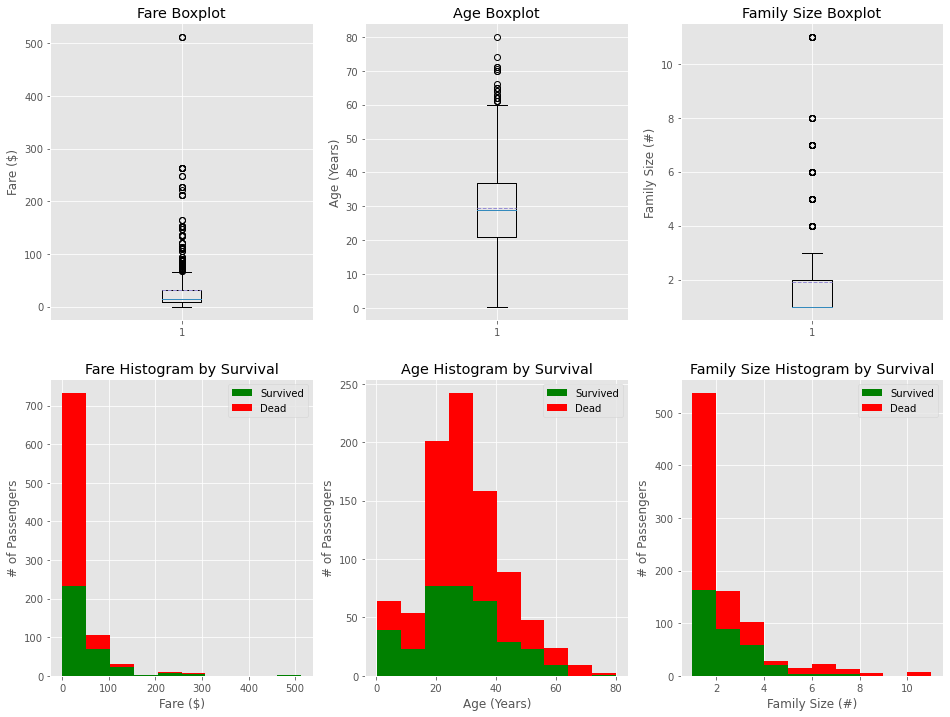

In [15]:
#to organize our graphics will use figure: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure
#subplot: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html#matplotlib.pyplot.subplot
#and subplotS: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html?highlight=matplotlib%20pyplot%20subplots#matplotlib.pyplot.subplots

#graph distribution of quantitative data
plt.figure(figsize=[16,12])

plt.subplot(231)
plt.boxplot(x=data1['Fare'], showmeans = True, meanline = True)
plt.title('Fare Boxplot')
plt.ylabel('Fare ($)')

plt.subplot(232)
plt.boxplot(data1['Age'], showmeans = True, meanline = True)
plt.title('Age Boxplot')
plt.ylabel('Age (Years)')

plt.subplot(233)
plt.boxplot(data1['FamilySize'], showmeans = True, meanline = True)
plt.title('Family Size Boxplot')
plt.ylabel('Family Size (#)')

plt.subplot(234)
plt.hist(x = [data1[data1['Survived']==1]['Fare'], data1[data1['Survived']==0]['Fare']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare ($)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(235)
plt.hist(x = [data1[data1['Survived']==1]['Age'], data1[data1['Survived']==0]['Age']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age (Years)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(236)
plt.hist(x = [data1[data1['Survived']==1]['FamilySize'], data1[data1['Survived']==0]['FamilySize']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Family Size Histogram by Survival')
plt.xlabel('Family Size (#)')
plt.ylabel('# of Passengers')
plt.legend()

In [16]:
def _get_nn_model():

#     classifier = Sequential()
#     classifier.add(Dense(activation="relu", input_dim=7, units=11, kernel_initializer="uniform"))
#     classifier.add(Dense(activation="relu", units=11, kernel_initializer="uniform"))
#     classifier.add(Dropout(0.5))
#     classifier.add(Dense(activation="relu", units=11, kernel_initializer="uniform"))
#     classifier.add(Dropout(0.5))
#     classifier.add(Dense(activation="relu", units=5, kernel_initializer="uniform"))
#     classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))
#     classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#     return classifier
    model = Sequential()
    model.add(Dense(activation="relu", input_dim=17, units=11, kernel_initializer="uniform"))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
#     model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
    return model

In [17]:
#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    # i. Ensemble Methods
    ensemble.RandomForestClassifier(),
    
    ensemble.BaggingClassifier(),
    ensemble.AdaBoostClassifier( tree.DecisionTreeClassifier(random_state = 11, max_features = "auto",max_depth = None)),
    
    
    # ii. SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),

    # iii. Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
     XGBClassifier()   
#         # v. PCA 
#     cluster.KMeans(n_clusters=2),
#     # iv. Neutal Nets 
#     _get_nn_model() 

    
    
    
    
    ]

In [18]:
data1[Target]


,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [19]:
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)
MLA_predict = data1[Target]
MLA_predict_test =  pd.DataFrame()
#index through MLA and save performance to table
row_index = 0
for alg in MLA:
    
    
#     #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, data1[data1_x_bin], data1[Target], cv  = cv_split, return_train_score=True)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    

#     #save MLA predictions - see section 6 for usage
    alg.fit(data1[data1_x_bin], data1[Target])
    MLA_predict[MLA_name] = alg.predict(data1[data1_x_bin])
    row_index+=1

    

MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare



,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Time
4,NuSVC,"{'break_ties': False, 'cache_size': 200, 'clas...",0.834644,0.827612,0.0542061
7,XGBClassifier,"{'objective': 'binary:logistic', 'base_score':...",0.888202,0.826866,0.412869
3,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.835581,0.826866,0.04478
0,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.892509,0.824254,0.224875
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.888951,0.815299,0.045778
2,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator__ccp_...",0.892509,0.807463,0.13545
6,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.847378,0.803358,0.0105711
5,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': True,...",0.801311,0.795896,0.0311179


In [20]:
#split train and test data with function defaults
#random_state -> seed or control random number generator: https://www.quora.com/What-is-seed-in-random-number-generation
# train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(data1[data1_x_calc], data1[Target], random_state = 0)
# train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(data1[data1_x_bin], data1[Target] , random_state = 0)
# train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = model_selection.train_test_split(data1_dummy[data1_x_dummy], data1[Target], random_state = 0)
train1_x_dummy.shape

(668, 17)

Text(0, 0.5, 'Algorithm')

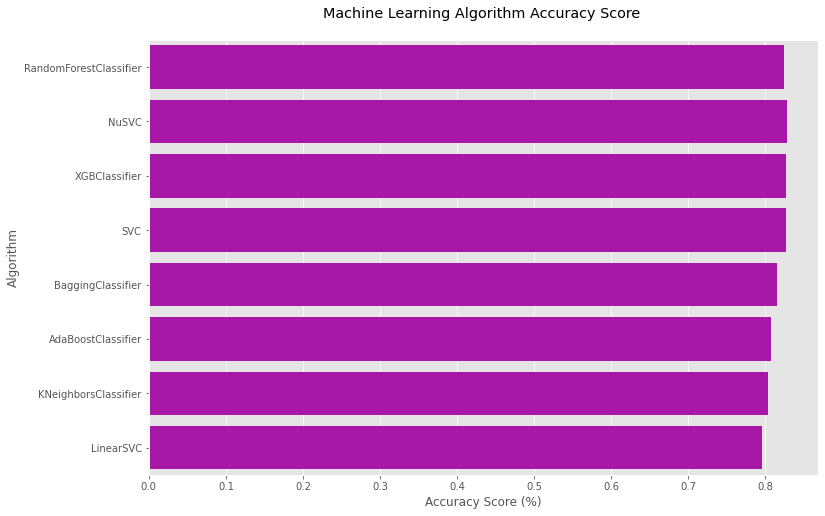

In [100]:
#barplot using https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(x='MLA Test Accuracy Mean', y = 'MLA Name', data = MLA_compare, color = 'm')

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

In [21]:
MLA_compare.iloc[0,1]

"{'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'nu': 0.5, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}"

In [22]:
model = Sequential()
model.add(Dense(activation="relu", input_dim=7, units=11, kernel_initializer="uniform"))
# model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
# model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
         loss='binary_crossentropy',
         metrics=['accuracy'])


In [23]:
from datetime import datetime
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

In [24]:




model.fit(train1_x_bin, train1_y_bin, batch_size = 10, epochs = 100,validation_split=0.1,verbose = 1,shuffle=True
#           ,callbacks=[tensorboard_callback]
         )


Epoch 1/100
61/61 [==============================] - 1s 9ms/step - loss: 0.6563 - accuracy: 0.6190 - val_loss: 0.7298 - val_accuracy: 0.4627
Epoch 2/100
61/61 [==============================] - 1s 9ms/step - loss: 0.6024 - accuracy: 0.6606 - val_loss: 0.6777 - val_accuracy: 0.5373
Epoch 3/100
61/61 [==============================] - 1s 11ms/step - loss: 0.5523 - accuracy: 0.7338 - val_loss: 0.6286 - val_accuracy: 0.6567
Epoch 4/100
61/61 [==============================] - 1s 15ms/step - loss: 0.5069 - accuracy: 0.7720 - val_loss: 0.5862 - val_accuracy: 0.6866
Epoch 5/100
61/61 [==============================] - 0s 7ms/step - loss: 0.4769 - accuracy: 0.7737 - val_loss: 0.5156 - val_accuracy: 0.7612
Epoch 6/100
61/61 [==============================] - 1s 9ms/step - loss: 0.4670 - accuracy: 0.7770 - val_loss: 0.5316 - val_accuracy: 0.7463
Epoch 7/100
61/61 [==============================] - 1s 9ms/step - loss: 0.4578 - accuracy: 0.7887 - val_loss: 0.5307 - val_accuracy: 0.7761
Epoch 8/100

Epoch 59/100
61/61 [==============================] - 0s 3ms/step - loss: 0.4094 - accuracy: 0.8220 - val_loss: 0.4592 - val_accuracy: 0.8209
Epoch 60/100
61/61 [==============================] - 0s 3ms/step - loss: 0.3907 - accuracy: 0.8419 - val_loss: 0.4999 - val_accuracy: 0.8209
Epoch 61/100
61/61 [==============================] - 0s 3ms/step - loss: 0.3971 - accuracy: 0.8319 - val_loss: 0.4601 - val_accuracy: 0.8060
Epoch 62/100
61/61 [==============================] - 0s 3ms/step - loss: 0.3920 - accuracy: 0.8369 - val_loss: 0.5034 - val_accuracy: 0.7761
Epoch 63/100
61/61 [==============================] - 0s 3ms/step - loss: 0.3963 - accuracy: 0.8386 - val_loss: 0.4454 - val_accuracy: 0.8507
Epoch 64/100
61/61 [==============================] - 0s 3ms/step - loss: 0.3886 - accuracy: 0.8353 - val_loss: 0.4756 - val_accuracy: 0.8209
Epoch 65/100
61/61 [==============================] - 0s 3ms/step - loss: 0.3911 - accuracy: 0.8369 - val_loss: 0.4544 - val_accuracy: 0.8358
Epoch 

In [25]:
y_pred=(model.predict(test1_x_bin) > 0.5).astype("int32")
print(metrics.accuracy_score(test1_y_bin, y_pred))

0.8251121076233184


In [26]:
results = model.evaluate(test1_x_bin, test1_y_bin, batch_size=10)

23/23 [==============================] - 0s 2ms/step - loss: 0.3757 - accuracy: 0.8251


In [27]:
#optimization



#RandomForestClassifier

MLA[0]
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 60, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

gridF = model_selection.GridSearchCV(MLA[0], random_grid, cv = 3, verbose = 1, 
                      n_jobs = 2)

bestF = gridF.fit(train1_x_bin, np.ravel(train1_y_bin,order='C'))
y_pred=bestF.predict(test1_x_bin)
print(metrics.accuracy_score(test1_y_bin, y_pred))



Fitting 3 folds for each of 4320 candidates, totalling 12960 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 tasks      | elapsed:    4.2s
[Parallel(n_jobs=2)]: Done 350 tasks      | elapsed:   27.0s
[Parallel(n_jobs=2)]: Done 710 tasks      | elapsed:  1.1min
[Parallel(n_jobs=2)]: Done 1060 tasks      | elapsed:  1.8min
[Parallel(n_jobs=2)]: Done 1510 tasks      | elapsed:  2.5min
[Parallel(n_jobs=2)]: Done 2060 tasks      | elapsed:  3.8min
[Parallel(n_jobs=2)]: Done 2710 tasks      | elapsed:  5.3min
[Parallel(n_jobs=2)]: Done 3460 tasks      | elapsed:  7.3min
[Parallel(n_jobs=2)]: Done 4310 tasks      | elapsed:  9.5min
[Parallel(n_jobs=2)]: Done 5260 tasks      | elapsed: 12.3min
[Parallel(n_jobs=2)]: Done 6310 tasks      | elapsed: 15.6min
[Parallel(n_jobs=2)]: Done 7460 tasks      | elapsed: 18.9min
[Parallel(n_jobs=2)]: Done 8710 tasks      | elapsed: 22.2min
[Parallel(n_jobs=2)]: Done 10658 tasks      | elapsed: 26.7min
[Parallel(n_jobs=2)]: Done 12957 out of 12960 | elapsed: 29

0.8295964125560538


In [28]:
MLA[0]= bestF 

In [29]:
bestF.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 20}

In [30]:
MLA[1]


BaggingClassifier()

In [42]:
#BaggingClassifier
MLA[1]

param_grid = {
    'base_estimator__max_depth' : [1, 2, 3, 4, 5],
    'max_samples' : [0.05, 0.1, 0.2, 0.5]
}

gridF = model_selection.GridSearchCV(ensemble.BaggingClassifier(tree.DecisionTreeClassifier(),
                                     n_estimators = 100, max_features = 0.5),
                   param_grid)

bestB = gridF.fit(train1_x_bin, train1_y_bin)
y_pred=bestB.predict(test1_x_bin)
print(metrics.accuracy_score(test1_y_bin, y_pred))



0.820627802690583


In [74]:
MLA[1] = bestB
bestB.best_params_

{'base_estimator__max_depth': 3, 'max_samples': 0.5}

In [47]:
MLA[2] =  ensemble.AdaBoostClassifier( tree.DecisionTreeClassifier(random_state = 11, max_features = "auto",max_depth = None))

In [77]:
# AdaBoostClassifier
MLA[2]
# param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
# #               "base_estimator__splitter" :   ["best", "random"],
#               "n_estimators": [1, 2]
#              }

# gridF = model_selection.GridSearchCV(MLA[2], param_grid, cv = 3, verbose = 1, 
#                       n_jobs = -1)

# bestADA = gridF.fit(train1_x, train1_y)
# y_pred=bestADA.predict(test1_x)
# print(metrics.accuracy_score(test1_y, y_pred))

param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [100,200,250,300]
             }


DTC = tree.DecisionTreeClassifier(random_state = 11, max_features = "auto",max_depth = None)

ABC = ensemble.AdaBoostClassifier(base_estimator = DTC)

# run grid search
grid_search_ABC = model_selection.GridSearchCV(MLA[2], param_grid=param_grid, scoring = 'roc_auc')
bestADA = grid_search_ABC.fit(train1_x_bin, train1_y_bin)
y_pred=bestADA.predict(test1_x_bin)
print(metrics.accuracy_score(test1_y_bin, y_pred))


0.8295964125560538


In [78]:
MLA[2] = bestADA
bestADA.best_params_


{'base_estimator__criterion': 'gini',
 'base_estimator__splitter': 'random',
 'n_estimators': 200}

In [53]:
MLA[2]

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_features='auto',
                                                         random_state=11))

In [75]:
# SVC

Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}


grid_search_SVC =  model_selection.GridSearchCV(
        MLA[3] , param_grid)
bestSVC = grid_search_SVC.fit(train1_x_bin, train1_y_bin)  
y_pred=bestADA.predict(test1_x_bin)
print(metrics.accuracy_score(test1_y_bin, y_pred))

0.8340807174887892


In [80]:
MLA[3] = bestSVC
bestSVC.best_params_

{'C': 1, 'gamma': 0.1}

In [81]:
# NuSVC
MLA[4]

# LinearSVC
MLA[5]

# KNeighborsClassifier
MLA[6]
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

#Convert to dictionary
param_grid_knn = {'leaf_size':leaf_size, 'n_neighbors':n_neighbors, 'p':p}
grid_search_SVC =  model_selection.GridSearchCV(
        MLA[6] , param_grid_knn)
bestKNN = grid_search_SVC.fit(train1_x_bin, train1_y_bin)  
y_pred=bestKNN.predict(test1_x_bin)
print(metrics.accuracy_score(test1_y_bin, y_pred))

0.8071748878923767


In [82]:
MLA[6] = bestKNN 
bestKNN.best_params_

{'leaf_size': 34, 'n_neighbors': 28, 'p': 1}

In [83]:
MLA[7]

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
grid_search_SVC =  model_selection.GridSearchCV(
        MLA[7] , params)
bestXGB = grid_search_SVC.fit(train1_x_bin, train1_y_bin)  
y_pred=bestXGB.predict(test1_x_bin)
print(metrics.accuracy_score(test1_y_bin, y_pred))


0.820627802690583


In [84]:
MLA[7] = bestXGB 
bestXGB.best_params_

{'colsample_bytree': 0.6,
 'gamma': 2,
 'max_depth': 3,
 'min_child_weight': 1,
 'subsample': 1.0}

In [41]:
history.history

NameError: name 'history' is not defined

In [92]:


for  i in range(len(MLA)):
    if (MLA[i].__class__.__name__)   not in [ 'AdaBoostClassifier','NuSVC' ,'LinearSVC'] :
         if MLA[i].__class__.__name__ =='GridSearchCV' :
            print(MLA[i].__class__.__name__)
            MLA[i] = MLA[i].best_estimator_
            print(MLA[i])
        

In [111]:
# for  i in range(len(MLA)):

#         print(MLA[i].__class__.__name__)
MLA_columns = ['Optimized MLA Name',"Optimized Parameters",'Optimized MLA  Accuracy']
MLA_optimized_compare = pd.DataFrame(columns = MLA_columns)

# #index through MLA and save performance to table
row_index = 0
for alg in MLA:
    
    
#     #set name and parameters
    MLA_name = alg.__class__.__name__

    MLA_optimized_compare.loc[row_index, 'Optimized MLA Name'] = MLA_name
    MLA_optimized_compare.loc[row_index, 'Optimized Parameters'] = str(alg.get_params())
    y_pred=alg.predict(test1_x_bin)
    MLA_optimized_compare.loc[row_index, 'Optimized MLA  Accuracy'] =  metrics.accuracy_score(test1_y_bin, y_pred)
    print(metrics.accuracy_score(test1_y_bin, y_pred))
    row_index+=1
new_row = {'Optimized MLA Name':'Neural Net',
           'Optimized MLA  Accuracy':(metrics.accuracy_score(test1_y_bin, (model.predict(test1_x_bin) > 0.5).astype("int32"))),
           'Optimized Parameters': str(model) }
MLA_optimized_compare.sort_values(by = ['Optimized MLA  Accuracy'], ascending = False, inplace = True)
MLA_optimized_compare



0.8295964125560538
0.820627802690583
0.8295964125560538
0.820627802690583
0.8251121076233184
0.7892376681614349
0.8071748878923767
0.820627802690583


,Optimized MLA Name,Optimized Parameters,Optimized MLA Accuracy
0,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.829596
2,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator__ccp_...",0.829596
4,NuSVC,"{'break_ties': False, 'cache_size': 200, 'clas...",0.825112
1,BaggingClassifier,"{'base_estimator__ccp_alpha': 0.0, 'base_estim...",0.820628
3,SVC,"{'C': 1, 'break_ties': False, 'cache_size': 20...",0.820628
7,XGBClassifier,"{'objective': 'binary:logistic', 'base_score':...",0.820628
6,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 34, 'metric...",0.807175
5,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': True,...",0.789238


In [112]:
MLA_optimized_compare = MLA_optimized_compare.append(new_row, ignore_index=True)
MLA_optimized_compare.sort_values(by = ['Optimized MLA  Accuracy'], ascending = False, inplace = True)

In [104]:
model

Text(0, 0.5, 'Algorithm')

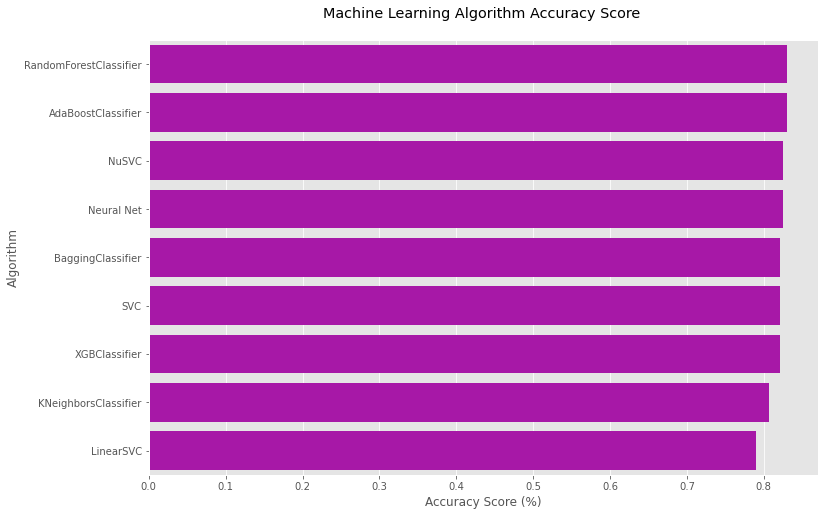

In [113]:
#barplot using https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(x='Optimized MLA  Accuracy', y = 'Optimized MLA Name', data = MLA_optimized_compare, color = 'm')

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')


In [114]:
MLA.append(model)

In [128]:
data_val[data1_x_bin]

,Sex_Code,Pclass,Embarked_Code,Title_Code,FamilySize,AgeBin_Code,FareBin_Code
0,1,3,1,5,1,2,0
1,0,3,2,6,2,3,0
2,1,2,1,5,1,4,1
3,1,3,2,5,1,1,1
4,0,3,2,6,3,1,1
...,...,...,...,...,...,...,...
413,1,3,2,5,1,1,1
414,0,1,0,1,1,2,3
415,1,3,2,5,1,2,0
416,1,3,2,5,1,1,1


In [139]:
(MLA[-1].predict(data_val[data1_x_bin]) > 0.5).astype("int32").reshape(-1)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [141]:
  for alg in MLA:
    result = pd.DataFrame()
    if(alg.__class__.__name__ == 'Sequential' ):
        result['Survived'] = (alg.predict(data_val[data1_x_bin]) > 0.5).astype("int32").reshape(-1)
    else:
        result['Survived'] = alg.predict(data_val[data1_x_bin])
        
    result['PassengerId'] = data_val['PassengerId']

    result.to_csv('output/'+alg.__class__.__name__ +".csv",index=False)
    

